<a href="https://colab.research.google.com/github/rupamm874-ui/TIH_Internship-Project/blob/main/TIHINTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installed missing package gensim
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 71.5 MB/s eta 0:00:00


In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the csv file using pandas dataframe
fake_news = pd.read_csv('/content/sample_data/fake.csv', engine='python', on_bad_lines='skip')
true_news = pd.read_csv('/content/sample_data/true.csv', engine='python', on_bad_lines='skip')

In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
true_news['label']=1

In [ ]:
fake_news['label'] = 0

In [ ]:
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news = pd.concat([fake_news,true_news], axis=0)

In [ ]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news.tail()

,title,text,subject,date,label
15978,EU MPs threaten Cambodia aid and trade over cr...,PHNOM PENH (Reuters) - A European Parliament d...,worldnews,"October 31, 2017",1
15979,China says will work with South Korea towards ...,BEIJING (Reuters) - China and South Korea will...,worldnews,"November 1, 2017",1
15980,Spain's High Court calls Puigdemont to testify...,MADRID (Reuters) - Spain s High Court on Tuesd...,worldnews,"October 31, 2017",1
15981,'Like any EU citizen': Belgium's Catalan asylu...,BRUSSELS (Reuters) - Belgium has given a cool ...,worldnews,"October 31, 2017",1
15982,No chateau: Catalan leader's modest Belgian exile,BRUSSELS (Reuters) - At 70 euros ($82) a night...,worldnews,"October 31, 2017",1


In [ ]:
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
print(type(news))
print(news.head())

<class 'pandas.core.frame.DataFrame'>
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  


In [ ]:
news =news.drop(['title','subject','date'],axis= 1)

In [ ]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
news= news.sample(frac=1).reset_index(drop=True)

In [ ]:
news.head()

,text,label
0,GENEVA (Reuters) - Air strikes by the Saudi-le...,1
1,WASHINGTON (Reuters) - Melania Trump will give...,1
2,"NEW YORK (Reuters) - Anthony Scaramucci, a hed...",1
3,BUDAPEST (Reuters) - Hungary is not planning t...,1
4,WASHINGTON (Reuters) - Republican presidential...,1


In [ ]:
news.tail()

,text,label
19414,ISTANBUL (Reuters) - Turkish police detained 1...,1
19415,CHICAGO (Reuters) - A U.S. judge on Friday dea...,1
19416,Donald Trump s Education Secretary found out h...,0
19417,"On Wednesday, Donald Trump once again lashed o...",0
19418,WASHINGTON (Reuters) - U.S. House Republicans ...,1


In [ ]:
news.reset_index(inplace= True)

In [ ]:
news.head()

,index,text,label
0,0,GENEVA (Reuters) - Air strikes by the Saudi-le...,1
1,1,WASHINGTON (Reuters) - Melania Trump will give...,1
2,2,"NEW YORK (Reuters) - Anthony Scaramucci, a hed...",1
3,3,BUDAPEST (Reuters) - Hungary is not planning t...,1
4,4,WASHINGTON (Reuters) - Republican presidential...,1


In [ ]:
news = news.reset_index(drop=True)

In [ ]:
news.head()

,text,label
0,GENEVA (Reuters) - Air strikes by the Saudi-le...,1
1,WASHINGTON (Reuters) - Melania Trump will give...,1
2,"NEW YORK (Reuters) - Anthony Scaramucci, a hed...",1
3,BUDAPEST (Reuters) - Hungary is not planning t...,1
4,WASHINGTON (Reuters) - Republican presidential...,1


In [ ]:
# view top 10 rows of processed dataset
news.head(10)

,text,label
0,GENEVA (Reuters) - Air strikes by the Saudi-le...,1
1,WASHINGTON (Reuters) - Melania Trump will give...,1
2,"NEW YORK (Reuters) - Anthony Scaramucci, a hed...",1
3,BUDAPEST (Reuters) - Hungary is not planning t...,1
4,WASHINGTON (Reuters) - Republican presidential...,1
5,WASHINGTON (Reuters) - The U.S. budget deal Co...,1
6,WASHINGTON (Reuters) - The nomination to be am...,1
7,PARIS (Reuters) - Major Western powers appeare...,1
8,"WASHINGTON (Reuters) - The Secret Service, tas...",1
9,WASHINGTON (Reuters) - U.S. Senator Chuck Gras...,1


In [ ]:
random_text = news.sample(n=1)['text'].item()
print(random_text)

WASHINGTON (Reuters) - Anthony Scaramucci, President Donald Trump’s new communications director, said on Sunday that one of his first tasks will be to halt leaks and that staff on his team would be fired if the leaks do not stop. “If we don’t get the leaks stopped, I am a businessperson, and so I will take dramatic action to stop those leaks,” Scaramucci said on Fox News Sunday. Scaramucci told CBS’s Face the Nation that leakers are “actually un-American,” and that he would lead a team meeting on Monday.  The hiring of Scaramucci, a Wall Street financier and Republican fundraiser, brings a combative style to the White House press office as President Donald Trump lashes out at probes into whether his campaign colluded with Russians during the 2016 campaign. Special counsel Robert Mueller is looking into any relationships or contacts between Trump campaign officials and Russia during the election, but Trump has not been accused of any wrongdoing by federal investigators.   White House pr

In [ ]:
print(news.sample(n=1))

                                                   text  label
4744  BRUSSELS (Reuters) - The European Union’s exec...      1


Text(0, 0.5, 'Number of News')

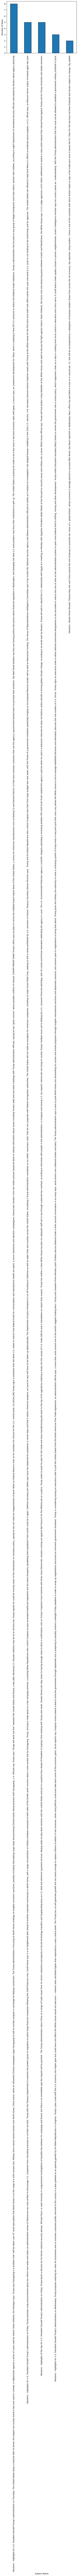

In [ ]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (news['text'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

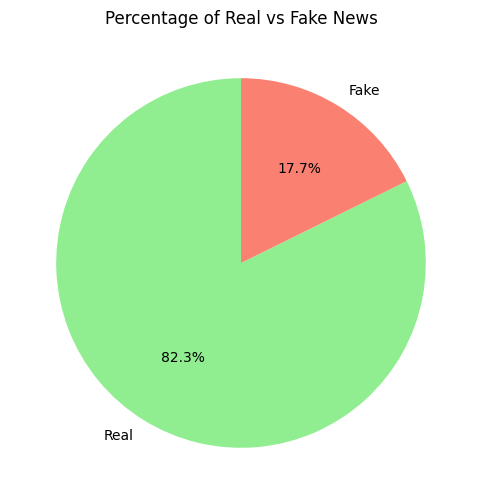

In [ ]:
import matplotlib.pyplot as plt

# Count real vs fake labels (assuming 0 = fake, 1 = real)
label_counts = news['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Real', 'Fake'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Percentage of Real vs Fake News')
plt.show()

In [ ]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [ ]:
news ['text'] = news['text'].apply(wordopt)

In [ ]:
news['text']

,text
0,geneva reuters air strikes by the saudi led mi...
1,washington reuters melania trump will give two...
2,new york reuters anthony scaramucci a hedge fu...
3,budapest reuters hungary is not planning to mo...
4,washington reuters republican presidential can...
...,...
19414,istanbul reuters turkish police detained 100 p...
19415,chicago reuters a u s judge on friday dealt a ...
19416,donald trump s education secretary found out h...
19417,on wednesday donald trump once again lashed ou...


In [ ]:
# apply wordopt method to the whole dataset and view the text content of a random data point
news['text']=news['text'].apply(wordopt)
news['text'][100]

'washington reuters republican leaders in the u s senate and house of representatives have reached an agreement in principle on tax reform legislation the associated press reported on twitter on wednesday citing unnamed sources the ap gave no further details and reuters was not immediately able to confirm the report '

In [ ]:
x = news['text']
y = news['label']

In [ ]:
x

,text
0,geneva reuters air strikes by the saudi led mi...
1,washington reuters melania trump will give two...
2,new york reuters anthony scaramucci a hedge fu...
3,budapest reuters hungary is not planning to mo...
4,washington reuters republican presidential can...
...,...
19414,istanbul reuters turkish police detained 100 p...
19415,chicago reuters a u s judge on friday dealt a ...
19416,donald trump s education secretary found out h...
19417,on wednesday donald trump once again lashed ou...


In [ ]:
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
19414,1
19415,1
19416,0
19417,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
x_train.shape

(14564,)

In [ ]:
x_test.shape

(4855,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()

In [ ]:
xv_train =vectorization.fit_transform(x_train)

In [ ]:
xv_test = vectorization.transform(x_test)

In [ ]:
xv_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3042187 stored elements and shape (14564, 64162)>

In [ ]:
xv_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1020913 stored elements and shape (4855, 64162)>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
LR.score(xv_test,y_test)

0.9915550978372811

In [ ]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       857
           1       0.99      1.00      0.99      3998

    accuracy                           0.99      4855
   macro avg       0.99      0.98      0.99      4855
weighted avg       0.99      0.99      0.99      4855



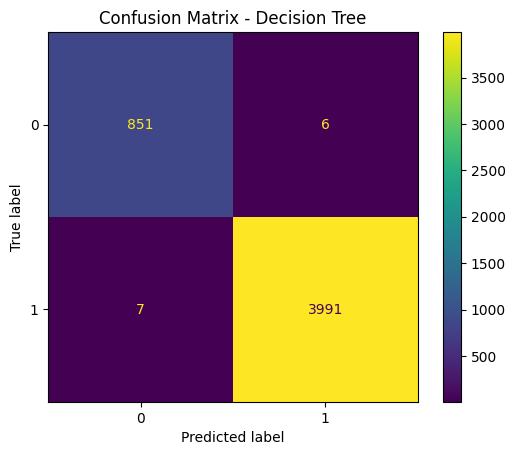

In [ ]:
# Check overall accuracy using confusion matrix for Decision Tree
cm_dtc = confusion_matrix(y_test, pred_dtc)
cm_display_dtc = ConfusionMatrixDisplay(confusion_matrix = cm_dtc)
cm_display_dtc.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

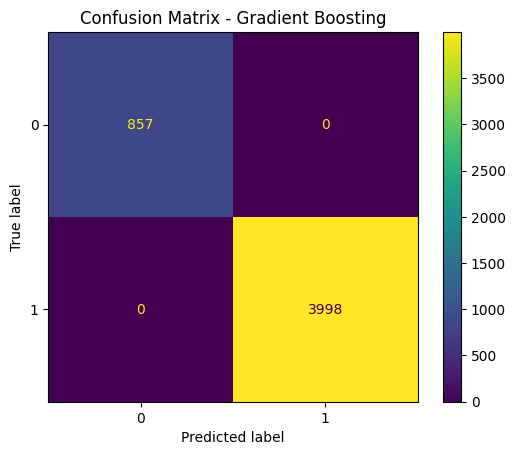

In [ ]:
# Check overall accuracy using confusion matrix for Gradient Boosting
cm_gbc = confusion_matrix(y_test, pred_gbc)
cm_display_gbc = ConfusionMatrixDisplay(confusion_matrix = cm_gbc)
cm_display_gbc.plot()
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC = DecisionTreeClassifier()

In [ ]:
DTC.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtc = DTC.predict(xv_test)

In [ ]:
DTC.score(xv_test, y_test)

0.9973223480947477

In [ ]:
DTC.score(xv_test,y_test)

0.9973223480947477

In [ ]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       857
           1       1.00      1.00      1.00      3998

    accuracy                           1.00      4855
   macro avg       1.00      1.00      1.00      4855
weighted avg       1.00      1.00      1.00      4855



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(xv_train,y_train)

RandomForestClassifier()

In [ ]:
predict_rfc = rfc.predict(xv_test)

In [ ]:
rfc.score(xv_test ,y_test)

0.9977342945417096

In [ ]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       857
           1       1.00      1.00      1.00      3998

    accuracy                           1.00      4855
   macro avg       1.00      0.99      1.00      4855
weighted avg       1.00      1.00      1.00      4855



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [195]:
gbc = GradientBoostingClassifier

In [ ]:
gbc.fit(xv_test ,y_test)

GradientBoostingClassifier()

In [ ]:
pred_gbc = gbc.predict(xv_test)

In [ ]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       857
           1       1.00      1.00      1.00      3998

    accuracy                           1.00      4855
   macro avg       1.00      1.00      1.00      4855
weighted avg       1.00      1.00      1.00      4855



In [ ]:
def output_label(n):
  if n==0:
    return "It is a Fake News"
  elif n == 1:
       return "It is a Genuine News"

In [ ]:
def manual_testing(news):
    testing_news = {"text": [news]}  # Corrected syntax for defining dictionary
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)  # Assuming 'vectorization' is your vectorizer object

    pred_lr = LR.predict(new_xv_test)
    pred_dtc = DTC.predict(new_xv_test)
    pred_gbc = gbc.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return """
LR Prediction: {}
GBC Prediction: {}
RFC Prediction: {}""".format(
        output_label(pred_lr[0]),
        output_label(pred_gbc[0]),
        output_label(pred_rfc[0])
    )